<a href="https://colab.research.google.com/github/1bin01/Machine-Learning/blob/main/Introduction-to-Machine-Learning/Ch7_working_with_text_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn
!pip install --upgrade joblib==1.1.0
!pip install -q --upgrade scikit-learn==1.0.2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from importlib import reload  # plt 다시 그릴 때
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 경고 제거 (없어도 문제는 x)

# 나눔 포트 설정 (런타임 다시 시작 해줘야됨!)
import matplotlib as mpl
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
mpl.rc('axes', unicode_minus=False)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=75ff15fe828da2f0469e2cad8050e4d582bdc24d41ef183b331c640728be593b
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 6.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

## 7.2 예제 애플리케이션: 영화 리뷰 감성 분석

In [3]:
import os.path

if not os.path.isfile('data/aclImdb_v1.tar.gz'):
    !wget -q http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
    !tar -xzf data/aclImdb_v1.tar.gz -C data
!rm -r data/aclImdb/train/unsup

In [4]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[6]:\n", text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [5]:
# <br> (개행) 삭제하기
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [6]:
print("class 별 샘플 수 : ", np.bincount(y_train))

class 별 샘플 수 :  [12500 12500]


In [7]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target

print("text_text의 길이:", len(text_train))
print("class 별 샘플 수 : ", np.bincount(y_train))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

text_text의 길이: 25000
class 별 샘플 수 :  [12500 12500]


## 7.3 텍스트 데이터를 BOW로 표현하기

In [9]:
# 각 단어가 얼마나 자주 등장하는 지만 헤아림

# 7.3.1 샘플 데이터에 BOW 적용하기
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

print("어희 사전의 크기 : ", len(vect.vocabulary_))
print("어휘 사전의 내용 : ", vect.vocabulary_)

어희 사전의 크기 :  13
어휘 사전의 내용 :  {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [10]:
bag_of_words = vect.transform(bards_words)
print("BOW : ", repr(bag_of_words))

BOW :  <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [11]:
# toarray 를 사용해 희소배열에서 Nunpy 배열로 바꿈
print("BOW의 밀집 표현 : \n", bag_of_words.toarray())

BOW의 밀집 표현 : 
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [12]:
# 7.3.2 영화 리뷰에 대한 BOW

vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train :\n", repr(X_train))

X_train :
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [13]:
feature_names = vect.get_feature_names_out()
print("특성의 개수 : ", len(feature_names))
print("처음 20개 특성 :\n", feature_names[:20])

특성의 개수 :  74849
처음 20개 특성 :
 ['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']


In [15]:
# 로지스틱 회귀를 이용해 학습시키기
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter = 1000), X_train, y_train, n_jobs = -1)
print("교차 검증의 점수 : {:.2f}" .format(np.mean(scores)))

교차 검증의 점수 : 0.88


In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter = 5000), param_grid, n_jobs = -1)
grid.fit(X_train, y_train)
print("최상의 교차검증 점수 : {:.2f} " .format(grid.best_score_))

최상의 교차검증 점수 : 0.89 


In [17]:
X_test = vect.transform(text_test)
print("test score : {:.2f}" .format(grid.score(X_test, y_test)))

test score : 0.88


In [21]:
# min_df : 토큰이 나타날 최소 문서 개수 지정
vect = CountVectorizer(min_df = 5).fit(text_train)
X_train = vect.transform(text_train)
print("min df로 토큰 개수 제한 : ", repr(X_train))

min df로 토큰 개수 제한 :  <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [22]:
feature_names = vect.get_feature_names_out()
print("처음 50개 특성 : \n", feature_names[:50])

처음 50개 특성 : 
 ['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']


In [23]:
grid = GridSearchCV(LogisticRegression(max_iter = 5000), param_grid, n_jobs = -1)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수 : {:.2f}" .format(grid.best_score_))

최상의 교차 검증 점수 : 0.89


In [24]:
# 7.4 불용어
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수 : ", len(ENGLISH_STOP_WORDS))

불용어 개수 :  318


In [27]:
vect = CountVectorizer(min_df = 5, stop_words = "english").fit(text_train)
X_train = vect.transform(text_train)
print("불용어가 제거된 train data : ", repr(X_train))

불용어가 제거된 train data :  <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [28]:
grid = GridSearchCV(LogisticRegression(max_iter = 5000), param_grid, n_jobs = -1)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수 : {:.2f}" .format(grid.best_score_))

최상의 교차 검증 점수 : 0.88


## 7.5 tf_idf로 데이터 스케일 변경하기

In [36]:
# 특정 문서에 자주 나타나는 단어에 가중치를 줌

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df = 5), LogisticRegression(max_iter = 5000))
param_grid = {'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, n_jobs = -1)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수 : {:.2f}" .format(grid.best_score_))

최상의 교차 검증 점수 : 0.89


In [39]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis = 0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names_out())

print("가장 낮은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[:20]])
print("가장 높은 tfidf를 가진 특성: \n", feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성: 
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [40]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성 : \n", feature_names[sorted_by_idf[:20]])

가장 낮은 idf를 가진 특성 : 
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be']


## 7.6 모델 계수 조사

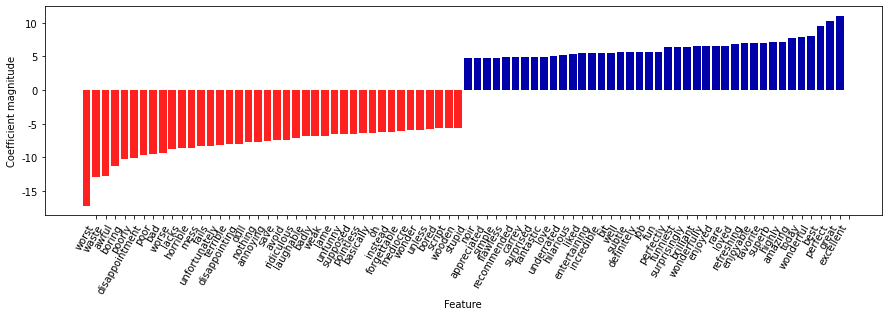

In [41]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_[0],
    feature_names, n_top_features = 40)

## 7.7 여러 단어로 만든 BOW

In [42]:
# 단어의 순서가 완전히 무시되는 단점을 보완 (n_그램)
cv = CountVectorizer(ngram_range = (1, 1)).fit(bards_words)
print("어휘 사전의 크기 : ", len(cv.vocabulary_))
print("어휘 사전: \n", cv.vocabulary_)

어휘 사전의 크기 :  13
어휘 사전: 
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [43]:
# 토큰 2개가 연속된 바이그램
# 단어의 순서가 완전히 무시되는 단점을 보완 (n_그램)
cv = CountVectorizer(ngram_range = (2, 2)).fit(bards_words)
print("어휘 사전의 크기 : ", len(cv.vocabulary_))
print("어휘 사전: \n", cv.get_feature_names_out())

어휘 사전의 크기 :  14
어휘 사전: 
 ['be fool' 'but the' 'doth think' 'fool doth' 'he is' 'himself to'
 'is wise' 'knows himself' 'man knows' 'the fool' 'the wise' 'think he'
 'to be' 'wise man']


In [45]:
print("밀집 배열로 변환 : \n", cv.transform(bards_words).toarray())

밀집 배열로 변환 : 
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [47]:
cv = CountVectorizer(ngram_range = (1, 3)).fit(bards_words)
print("어휘 사전의 크기 : ", len(cv.vocabulary_))
print("어휘 사전: \n", cv.get_feature_names_out())

어휘 사전의 크기 :  39
어휘 사전: 
 ['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


In [52]:
pipe = make_pipeline(TfidfVectorizer(min_df = 5), LogisticRegression(max_iter = 5000))
param_grid = {
    'logisticregression__C' : [0.001, 0.01, 0.1, 1, 10],
    'tfidfvectorizer__ngram_range' : [(1, 1), (1, 2), (1, 3)]
}

grid = GridSearchCV(pipe, param_grid, n_jobs = -1)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수 : {:.2f}" .format(grid.best_score_))
print("최적의 매개변수 : \n" .format(grid.best_params_))

최상의 교차 검증 점수 : 0.91
최적의 매개변수 : 



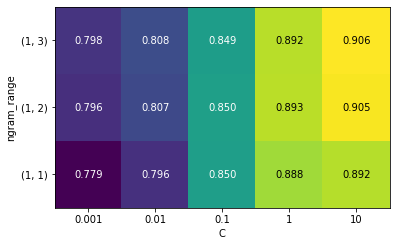

In [53]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T

heatmap = mglearn.tools.heatmap(
    scores, xlabel = "C", ylabel = "ngram_range", cmap = "viridis", fmt = "%.3f",
    xticklabels = param_grid['logisticregression__C'],
    yticklabels = param_grid['tfidfvectorizer__ngram_range'])

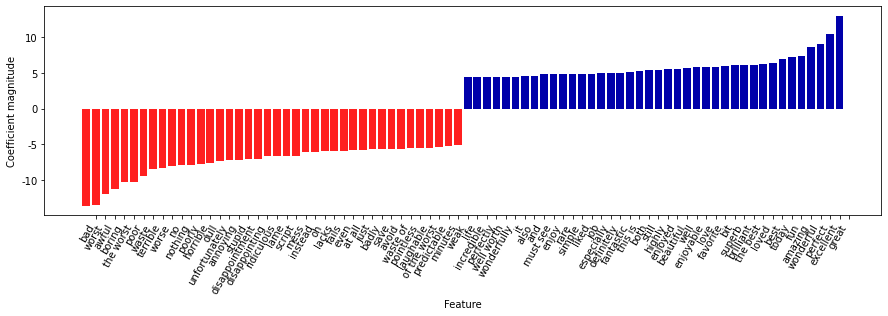

In [54]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names_out())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features = 40)

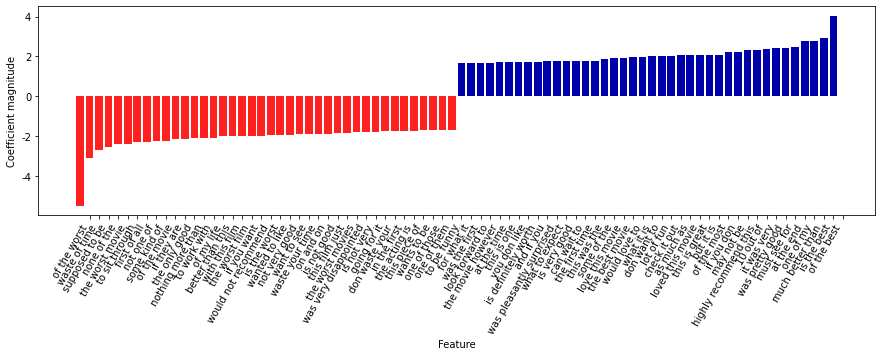

In [55]:
# 트라이그램만 확인
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features = 40)

## 7.8 고급 토큰화, 어간 추출, 표제어 추출